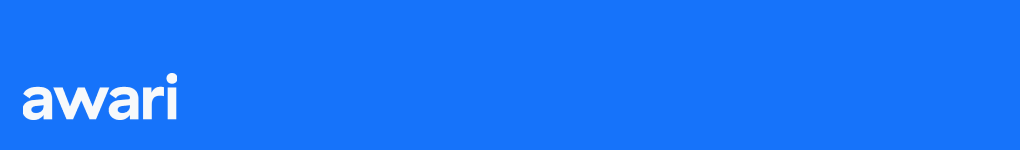

Prática da **Aula 05: Web scraping com Selenium**, do curso de **Data Science** da **[Awari](https://awari.com.br/)**. Para utilizá-la, vá no menu "Arquivo" e, em seguida, na opção "Salvar uma cópia no Drive". Isto criará uma cópia deste notebook em uma pasta chamada "Colab Notebooks", no seu Google Drive pessoal. Use a cópia para criar novas células de código ou executar as células desta prática.

---

# **Web scraping com Selenium**

## **Visão geral**

**Web Scraping** é a técnica de “raspar” dados de páginas web. Com *web scraping*, é possível obter muitos dados públicos disponíveis na web, mas que não estão acessíveis por meio de APIs, por exemplo.

**Selenium** é um conjunto de ferramentas de código aberto multiplataforma, usado para testar aplicações web pelo browser de forma automatizada. Ele executa testes de funcionalidades da aplicação web e testes de compatibilidade entre browser e plataformas diferentes. Selenium suporta diversas linguagens de programação, como C#, Java e Python, e vários navegadores web como o Chrome e o Firefox.

## **Objetivo da prática**

Demonstrar como é feito *web scraping* com Selenium em Python.

## **Realizando o scraping**

O primeiro passo para realizar web scraping é instalar o pacote que usaremos — no caso, o Selenium:

```py
# Instalação do Selenium
!pip install selenium

In [1]:
# Importando bibliotecas que usaremos
import time
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
import pandas as pd

In [21]:
# driver = webdriver.Chrome()
# driver.get("https://www.selenium.dev/selenium/web/web-form.html")
# title = driver.title
# text_box = driver.find_element(by=By.NAME, value="my-text")
# submit_button = driver.find_element(by=By.CSS_SELECTOR, value="button")
# driver.implicitly_wait(0.5)
# text_box.send_keys("André")
# submit_button.click()

In [2]:
# Definição de Janela Desktop
chrome_options = Options()
chrome_options.add_argument("--incognito")
chrome_options.add_argument("--window-size=1920x1080")

Antes do próximo passo, é necessário instalar o webdriver do Selenium.

O download do driver pode ser feito em: https://www.selenium.dev/pt-br/documentation/getting_started/installing_browser_drivers/.

In [2]:
options = webdriver.ChromeOptions()
driver = webdriver.Chrome(options=options)

In [3]:
# Chamando a URL de um site que queremos raspar
url = "https://www.kabum.com.br/"
driver.get(url)
time.sleep(2)

### **Localizando elementos**

Páginas web são estruturadas por meio da linguagem de marcação **HTML**.

Essa linguagem possui uma série de *tags* e *atributos* que especificam o que é cada coisa na tela (um texto, uma lista, uma imagem, um título etc.).

Selenium usa essas marcações para saber o que deve raspar em uma página.

Vamos ver os principais elementos que podemos usar nesse processo.

#### **Atributo ```id```**
```
els = driver.find_elements_by_id(elementId)
```

#### **Atributo ```name```**
```
els = driver.find_elements_by_name(elementName)
```

#### **Atributo ```class```**
```
els = driver.find_elements_by_class_name(elementClass)
```

#### **Texto específico**
```
els = driver.find_elements_by_link_text(elementLink)
```

#### **Parte de texto**
```
els = driver.find_elements_by_partial_link_text(elementpartialLink)
```

###  **Seletor CSS**

Tipos de seletores:

* ```.``` = classe (class)

* ```#``` = id

Referências: https://developer.mozilla.org/pt-BR/docs/Web/CSS/CSS_Selectors.

```
els = driver.find_elements_by_css_selector(element_css_selector)
```

#### **Caminho Xpath**
```
els = driver.find_elements_by_xpath(element_x_path)
```

In [4]:
input_search = driver.find_element(By.XPATH, "//*[@id='input-busca']")
input_search

<selenium.webdriver.remote.webelement.WebElement (session="85ff73eb009d34e9593a8e45034c70e9", element="f.84E775D8FCB84323A004B01E5FD5F069.d.B6F0730797D430A73BDA4F1280F6B8A7.e.67")>

### **Tipos de Ações**

Principais ações:
 - **click** - envia ação de click ao elemento;
 - **send_keys** - envia texto ao elemento de input;
 - **double_click** - envia duplo click ao elemento.

Referência:
https://www.selenium.dev/selenium/docs/api/java/org/openqa/selenium/interactions/Actions.html.

In [5]:
## Envia texto a caixa de texto
input_search.send_keys('Teclado Gamer')

NameError: name 'input_search' is not defined

In [6]:
## Encontra botão de buscar e clica
buttom_search = driver.find_element(By.XPATH, ' //*[@id="barraBuscaKabum"]/div/form/button')
buttom_search.click()

In [43]:
time.sleep(2)

In [64]:
first_element = driver.find_element(By.XPATH, '//*[@id="listing"]/div/div/div/div/div/main/div/article/a')
first_element.text

'Frete grátis*\nMouse Sem Fio Logitech Lift Left Vertical - Grafite - 910-006467\nR$ 309,00\nÀ vista no PIX\nou até\n10x de R$ 30,90'

In [63]:
product_title = first_element.find_element(By.CSS_SELECTOR, 'div > button > div > h3').text
product_title

'Mouse Sem Fio Logitech Lift Left Vertical - Grafite - 910-006467'

In [65]:
product_price = first_element.find_element(By.CSS_SELECTOR,'div > div.sc-84f95ca7-0.ewZdLf.availablePricesCard > div.flex.items-center.gap-6.h-\[22px\].tablet\:h-\[28px\] > span').text
product_price

<>:1: SyntaxWarning: invalid escape sequence '\['
<>:1: SyntaxWarning: invalid escape sequence '\['
C:\Users\andre\AppData\Local\Temp\ipykernel_11148\1570125858.py:1: SyntaxWarning: invalid escape sequence '\['
  product_price = first_element.find_element(By.CSS_SELECTOR,'div > div.sc-84f95ca7-0.ewZdLf.availablePricesCard > div.flex.items-center.gap-6.h-\[22px\].tablet\:h-\[28px\] > span').text


'R$ 309,00'

## **Exemplo: raspando os elementos de uma busca**

In [47]:
results = driver.find_element(By.XPATH,'//*[@id="listing"]/div/div/div/div/div/main')

In [56]:
print(results.get_attribute('outerHTML'))

<main class="sc-68afdc85-13 eTXlUT"><div class="p-[3px] rounded-4 group bg-white shadow-[0_0_1px_rgba(40,41,61,0.08),0_0.5px_2px_rgba(96,97,112,0.16)] hover:shadow-lg"><article class="sc-72b286c2-6 jeTDFl productCard"><div class="relative flex items-start justify-between w-full p-8 pb-0 h-48"><div class="flex overflow-hidden pr-2"></div><div style="transform-style: preserve-3d; perspective: 1000px; transform: none; will-change: transform;"><div class="flex items-center justify-between" style="backface-visibility: hidden;"><div class="flex justify-end items-center h-24 gap-4 w-full"><div class="flex flex-col items-end"><span class="sc-72b286c2-17 kksEUL">Patrocinado</span></div></div></div><div class="hidden gap-2 items-start justify-between" style="backface-visibility: hidden; transform: rotateX(180deg);"><div class="flex gap-8"><button type="button" aria-label="Adicionar na lista de desejos" aria-pressed="false" class="wishlistCard flex items-center justify-center"><svg width="24" hei

In [90]:
## O retorno desta função é uma lista de elementos com esta classe do titulo do produto
title_results = results.find_elements(By.CSS_SELECTOR,'.sc-d79c9c3f-0.nlmfp.sc-72b286c2-13.NajYd.nameCard')

In [91]:
## Podemos iterar sobre a lista para pegar um elemento especifico
product_list = [el.text for el in title_results]
product_list

['Mouse Sem Fio Logitech Lift Left Vertical - Grafite - 910-006467',
 'Teclado Mecânico Gamer Machenike K500-B61, Switch Brown, ABNT, Branco - K500-B61BBR',
 'Teclado Mecânico Gamer Machenike K500B-B87, Switch Brown, ABNT Azul - K500B-B87BBR',
 'Teclado Mecânico Gamer HyperX Alloy MKW100, RGB, Switch Red, Full Size, US, Preto - 4P5E1AA#ABA',
 'Teclado Mecânico Gamer Redragon Kumara, Anti-Ghosting, RGB, Switch Outemu Brown, ABNT2, Preto, PT - K552RGB-1 (PT-BROWN)',
 'Teclado Mecânico Gamer Machenike K500-B61, RGB, Switch Huano Brown, Cinza - MAC-K500-B61GBR-WW',
 'Teclado Gamer Redragon Lakshmi, Switch Brown, Layout 60%, ABNT2 , Preto - K606-OG&GY&BK (PT-BROWN)',
 'Teclado Mecânico Gamer Redragon Lakshmi K606R 60%, LED Rainbow, Switch Redragon MK II, ABNT2, Preto - K606R (PT-BLUE)',
 'Teclado Mecânico Gamer Redragon Kumara, Anti-Ghosting, LED Vermelho, Switch Outemu Brown, ABNT2, Preto - K552-2 (PT-BROWN)',
 'Teclado Mecânico Gamer Redragon Lakshmi, Rainbow Brown, Switch, ABNT2, Preto -

In [86]:
## O retorno desta função é uma lista de elementos com esta classe do preço do ´roduto.
price_results = results.find_elements(By.CSS_SELECTOR,'.sc-84f95ca7-2.jJMtJn.priceCard')
price_results

[<selenium.webdriver.remote.webelement.WebElement (session="85ff73eb009d34e9593a8e45034c70e9", element="f.84E775D8FCB84323A004B01E5FD5F069.d.EB2C185D9E0AB4DA8630F78C5E3E3FFE.e.10664")>,
 <selenium.webdriver.remote.webelement.WebElement (session="85ff73eb009d34e9593a8e45034c70e9", element="f.84E775D8FCB84323A004B01E5FD5F069.d.EB2C185D9E0AB4DA8630F78C5E3E3FFE.e.10720")>,
 <selenium.webdriver.remote.webelement.WebElement (session="85ff73eb009d34e9593a8e45034c70e9", element="f.84E775D8FCB84323A004B01E5FD5F069.d.EB2C185D9E0AB4DA8630F78C5E3E3FFE.e.10780")>,
 <selenium.webdriver.remote.webelement.WebElement (session="85ff73eb009d34e9593a8e45034c70e9", element="f.84E775D8FCB84323A004B01E5FD5F069.d.EB2C185D9E0AB4DA8630F78C5E3E3FFE.e.10858")>,
 <selenium.webdriver.remote.webelement.WebElement (session="85ff73eb009d34e9593a8e45034c70e9", element="f.84E775D8FCB84323A004B01E5FD5F069.d.EB2C185D9E0AB4DA8630F78C5E3E3FFE.e.10923")>,
 <selenium.webdriver.remote.webelement.WebElement (session="85ff73eb00

In [87]:
price_list = [el.text for el in price_results]
price_list

['R$ 309,00',
 'R$ 169,99',
 'R$ 169,99',
 'R$ 279,99',
 'R$ 209,99',
 'R$ 179,99',
 'R$ 169,99',
 'R$ 145,99',
 'R$ 175,99',
 'R$ 145,99',
 'R$ 129,99',
 'R$ 182,99',
 'R$ 149,99',
 'R$ 249,90',
 'R$ 167,99',
 'R$ 459,99',
 'R$ 189,99',
 'R$ 279,99',
 'R$ 139,99',
 'R$ 129,99',
 'R$ 159,99']

In [92]:
pd.DataFrame({'produto':product_list, 'preco':price_list})

,produto,preco
0,Mouse Sem Fio Logitech Lift Left Vertical - Gr...,"R$ 309,00"
1,"Teclado Mecânico Gamer Machenike K500-B61, Swi...","R$ 169,99"
2,"Teclado Mecânico Gamer Machenike K500B-B87, Sw...","R$ 169,99"
3,"Teclado Mecânico Gamer HyperX Alloy MKW100, RG...","R$ 279,99"
4,"Teclado Mecânico Gamer Redragon Kumara, Anti-G...","R$ 209,99"
5,"Teclado Mecânico Gamer Machenike K500-B61, RGB...","R$ 179,99"
6,"Teclado Gamer Redragon Lakshmi, Switch Brown, ...","R$ 169,99"
7,Teclado Mecânico Gamer Redragon Lakshmi K606R ...,"R$ 145,99"
8,"Teclado Mecânico Gamer Redragon Kumara, Anti-G...","R$ 175,99"
9,"Teclado Mecânico Gamer Redragon Lakshmi, Rainb...","R$ 145,99"


webDriver.Close() - Close the browser window that the driver has focus of

webDriver.Quit() - Calls Dispose()

webDriver.Dispose() Closes all browser windows and safely ends the session

In [ ]:
driver.quit()

## **Sugestão de exercício**

Caso você se sinta confortável, sugerimos praticar os conceitos realizando scrapping de vagas no Linkedin. O seletor de elemento fica a seu critério.

Página a ser raspada: https://br.linkedin.com/jobs/ci%C3%AAncia-de-dados-vagas?position=1&pageNum=0

---

Notebook utilizado para fins educacionais da **Awari**.

**© AWARI. Todos os direitos reservados.**

In [ ]:
email_user = ''
pass_user ='.'

In [4]:
options = webdriver.ChromeOptions()
driver = webdriver.Chrome(options=options)

In [6]:
# Chamando a URL de um site que queremos raspar
url = "https://app.awari.com.br/cursos/data-science-2/tudo-sobre-o-curso-24"
driver.get(url)
time.sleep(2)

In [7]:
## Envia o email a caixa de texto
driver.find_element(By.XPATH, ' //*[@id="email"]').send_keys('email_user')

In [8]:
## Encontra botão de seguir e clica
driver.find_element(By.XPATH, '//*[@id="root"]/div/div[1]/div/div[2]/div/form/button').click()

In [9]:
## Envia a senha a caixa de texto
driver.find_element(By.XPATH, '//*[@id="password"]').send_keys(pass_user)

In [10]:
## Encontra botão de seguir e clica
driver.find_element(By.XPATH, '//*[@id="root"]/div/div[1]/div/div[2]/div/form/div[5]/button').click()

In [11]:
## Encontra o botão do curso e clica
driver.find_element(By.XPATH, '//*[@id="root"]/div/div[1]/div[2]/div/div[2]/div/div[2]/div/div/div[2]/button/div[2]/span').click()

In [63]:
sider_bar = driver.find_element(By.XPATH, '//*[@id="sidebar-content"]/div')
sider_bar

<selenium.webdriver.remote.webelement.WebElement (session="d38731f1deb943817c5d4794fdab2627", element="f.9879FE96A94889E8B5BB24D2D40E55B8.d.380D3761D950536073027FB77E8B4DA0.e.10825")>

In [103]:
## O retorno desta função é uma lista de elementos com esta classe do preço do ´roduto.
cursos_results = sider_bar.find_elements(By.XPATH, './div/div/div')
cursos_results


[<selenium.webdriver.remote.webelement.WebElement (session="d38731f1deb943817c5d4794fdab2627", element="f.9879FE96A94889E8B5BB24D2D40E55B8.d.380D3761D950536073027FB77E8B4DA0.e.10828")>,
 <selenium.webdriver.remote.webelement.WebElement (session="d38731f1deb943817c5d4794fdab2627", element="f.9879FE96A94889E8B5BB24D2D40E55B8.d.380D3761D950536073027FB77E8B4DA0.e.10838")>,
 <selenium.webdriver.remote.webelement.WebElement (session="d38731f1deb943817c5d4794fdab2627", element="f.9879FE96A94889E8B5BB24D2D40E55B8.d.380D3761D950536073027FB77E8B4DA0.e.10861")>,
 <selenium.webdriver.remote.webelement.WebElement (session="d38731f1deb943817c5d4794fdab2627", element="f.9879FE96A94889E8B5BB24D2D40E55B8.d.380D3761D950536073027FB77E8B4DA0.e.10871")>,
 <selenium.webdriver.remote.webelement.WebElement (session="d38731f1deb943817c5d4794fdab2627", element="f.9879FE96A94889E8B5BB24D2D40E55B8.d.380D3761D950536073027FB77E8B4DA0.e.11004")>,
 <selenium.webdriver.remote.webelement.WebElement (session="d38731f1de

In [104]:
# Initialize a list to store all lines
all_lines = []

# Iterate through the cursos_results to extract text
for curso in cursos_results:
    text = curso.text  # Get the text from the element
    lines = text.split('\n')  # Split into lines
    all_lines.extend(lines)  # Add the lines to the all_lines list

In [105]:
all_lines

['Inicia sua Jornada aqui!',
 '',
 'Introdução a Data Science',
 'Seu Material para o Curso',
 'Roteiro da 1ª Aula',
 'Vídeo: Conceitos de Base',
 'Quiz: Perfil da Turma',
 'Slides e Gravação de Aula: O que é Data Science?',
 'Slides: Google Colab',
 'Prática: Codando no Colab',
 'Leitura: Visão Geral de Data Science',
 'Leitura: Ciclos de Projetos na Área',
 'Leitura: Pensamento Analítico e Científico',
 'Leitura: Por que Interessa a Negócios?',
 'Leitura: Principais Tecnologias',
 'Faça para a 2ª Aula',
 'Matemática para Data Science',
 'Roteiro da 2ª Aula',
 'Slides e Gravação de Aula: Revisão Matemática',
 'Prática: Matemática Básica no Colab',
 'Leitura: Pensamento Analítico e Científico',
 'Leitura: Por que Interessa a Negócios?',
 'Leitura: Dado, Informação e Conhecimento',
 'Leitura: Decisões Informadas por Dados',
 'Faça para a 3ª Aula',
 'Linguagem Python',
 'Roteiro da 3ª Aula',
 'Slides e Gravação de Aula: Boas-vindas a Python',
 'Prática: Primeiro Contato com Python',
 'Le

In [106]:
# Create a DataFrame from the list of lines
df = pd.DataFrame(all_lines, columns=['Texto'])  # Specify column name during DataFrame creation

# Reset index if necessary
df.reset_index(drop=True, inplace=True)  # Drop old index

# Print the DataFrame to see the result
print(df)

                                       Texto
0                   Inicia sua Jornada aqui!
1                                           
2                  Introdução a Data Science
3                  Seu Material para o Curso
4                         Roteiro da 1ª Aula
..                                       ...
149  Leitura: Comunicação Assertiva de Dados
150      Leitura: Posicionamento de Carreira
151   Leitura: Livros, Artigos e Referências
152        Leitura: Encontrando a Comunidade
153               Continue a se Desenvolver!

[154 rows x 1 columns]


In [108]:
df.to_csv()

',Texto\r\n0,Inicia sua Jornada aqui!\r\n1,\r\n2,Introdução a Data Science\r\n3,Seu Material para o Curso\r\n4,Roteiro da 1ª Aula\r\n5,Vídeo: Conceitos de Base\r\n6,Quiz: Perfil da Turma\r\n7,Slides e Gravação de Aula: O que é Data Science?\r\n8,Slides: Google Colab\r\n9,Prática: Codando no Colab\r\n10,Leitura: Visão Geral de Data Science\r\n11,Leitura: Ciclos de Projetos na Área\r\n12,Leitura: Pensamento Analítico e Científico\r\n13,Leitura: Por que Interessa a Negócios?\r\n14,Leitura: Principais Tecnologias\r\n15,Faça para a 2ª Aula\r\n16,Matemática para Data Science\r\n17,Roteiro da 2ª Aula\r\n18,Slides e Gravação de Aula: Revisão Matemática\r\n19,Prática: Matemática Básica no Colab\r\n20,Leitura: Pensamento Analítico e Científico\r\n21,Leitura: Por que Interessa a Negócios?\r\n22,"Leitura: Dado, Informação e Conhecimento"\r\n23,Leitura: Decisões Informadas por Dados\r\n24,Faça para a 3ª Aula\r\n25,Linguagem Python\r\n26,Roteiro da 3ª Aula\r\n27,Slides e Gravação de Aula: Boas-vinda

In [93]:
lines = [line.strip() for line in df['Texto'].split('\n')]


AttributeError: 'Series' object has no attribute 'split'

In [33]:
## O retorno desta função é uma lista de elementos com esta classe do preço do ´roduto.
cursos_results = driver.find_elements(By.CSS_SELECTOR, '#sidebar-content > div > div > div')
cursos_results



[<selenium.webdriver.remote.webelement.WebElement (session="d38731f1deb943817c5d4794fdab2627", element="f.9879FE96A94889E8B5BB24D2D40E55B8.d.380D3761D950536073027FB77E8B4DA0.e.3583")>,
 <selenium.webdriver.remote.webelement.WebElement (session="d38731f1deb943817c5d4794fdab2627", element="f.9879FE96A94889E8B5BB24D2D40E55B8.d.380D3761D950536073027FB77E8B4DA0.e.3616")>,
 <selenium.webdriver.remote.webelement.WebElement (session="d38731f1deb943817c5d4794fdab2627", element="f.9879FE96A94889E8B5BB24D2D40E55B8.d.380D3761D950536073027FB77E8B4DA0.e.3759")>,
 <selenium.webdriver.remote.webelement.WebElement (session="d38731f1deb943817c5d4794fdab2627", element="f.9879FE96A94889E8B5BB24D2D40E55B8.d.380D3761D950536073027FB77E8B4DA0.e.3852")>,
 <selenium.webdriver.remote.webelement.WebElement (session="d38731f1deb943817c5d4794fdab2627", element="f.9879FE96A94889E8B5BB24D2D40E55B8.d.380D3761D950536073027FB77E8B4DA0.e.3945")>,
 <selenium.webdriver.remote.webelement.WebElement (session="d38731f1deb9438

In [40]:
cursos_list = [cursos.text for cursos in cursos_results]
cursos_list

TypeError: 'WebElement' object is not iterable

In [ ]:
## O retorno desta função é uma lista de elementos com esta classe do titulo do produto
title_results = handler.find_elements(By.CSS_SELECTOR,'.sc-d79c9c3f-0.nlmfp.sc-72b286c2-13.NajYd.nameCard')

In [ ]:
driver.quit()